In [6]:
import numpy as np
import json
import datetime
import matplotlib.pyplot as plt

In [7]:
def generate_product_stock_data(num_points=365, initial_value=20, trend_slope=0.3, seasonality_strength=0.1, noise_strength=0.1, autocorrelation_strength=0.8, impulse_strength=0.5):
    np.random.seed(42)  # Set seed for reproducibility

    # Generate time points for a year
    dates = [datetime.date(2023, 1, 1) + datetime.timedelta(days=i) for i in range(num_points)]

    # Generate trend with a lower initial value
    trend = initial_value + np.arange(num_points) * trend_slope

    # Generate seasonality
    seasonality = seasonality_strength * np.sin(2 * np.pi * np.arange(num_points) / 365)

    # Generate noise
    noise = noise_strength * np.random.normal(size=num_points)

    # Generate autocorrelation
    autocorrelation = autocorrelation_strength * np.random.normal(size=num_points - 1)
    autocorrelation = np.concatenate([[0], np.cumsum(autocorrelation)])

    # Generate impulses
    impulses = np.zeros(num_points)
    impulse_indices = np.sort(np.random.choice(num_points, int(impulse_strength * num_points), replace=False))
    impulses[impulse_indices] = 2 * np.abs(np.random.normal(size=len(impulse_indices)))

    # Combine components
    stock_data = trend + seasonality + noise + autocorrelation + impulses

    # Ensure stock values do not go below 0
    stock_data = np.round(np.maximum(stock_data, 0))

    # Create a dictionary to store the data
    data_dict = {
        "dates": [str(date) for date in dates],
        "stock_data": stock_data.tolist()
    }

    return data_dict

In [8]:
def save_data_to_json(data_dict, filename="product_stock_data.json"):
    with open(filename, "w") as json_file:
        json.dump(data_dict, json_file)

In [9]:
def plot_product_stock_data(data_dict):
    dates = [datetime.datetime.strptime(date, "%Y-%m-%d").date() for date in data_dict["dates"]]
    stock_data = data_dict["stock_data"]

    plt.figure(figsize=(10, 6))
    plt.plot(dates, stock_data, label='Product Stock Data', color='blue')
    plt.title('Generated Product Stock Data')
    plt.xlabel('Date')
    plt.ylabel('Stock Value')
    plt.legend()
    plt.grid(True)
    plt.show()

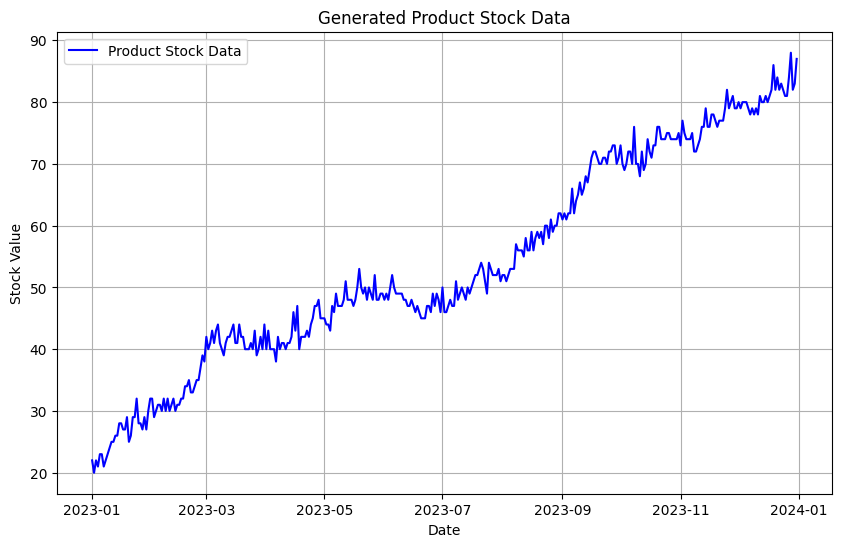

In [10]:
# Generate product stock data
product_stock_data = generate_product_stock_data(initial_value=20, trend_slope=0.2)

# Save data to JSON file
save_data_to_json(product_stock_data)

# Plot product stock data
plot_product_stock_data(product_stock_data)